## Data Source
For this project, we are working with four datasets, each providing a unique perspective on energy and emissions data. 
1. CO2 Emissions dataset: https://www.eia.gov/opendata/browser/co2-emissions/co2-emissions-aggregates?frequency=annual&data=value;&sortColumn=period;&sortDirection=desc;
2. Retail Electric Sales Data: https://www.eia.gov/opendata/browser/electricity/retail-sales
3. Electric Power Operational Data: https://www.eia.gov/opendata/browser/electricity/electric-power-operational-data
4. Emissions by State by Fuel: https://www.eia.gov/opendata/browser/electricity/state-electricity-profiles/emissions-by-state-by-fuel

This section focuses on the **CO2 Emissions data**.
This dataset provides annual carbon dioxide emissions data aggregated across sectors, fuels, and states. It includes metrics such as emissions values (measured in million metric tons of CO2) and offers insights into emissions trends, energy consumption impacts, and regional contributions.

## CO2 Emissions dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import json
from datetime import timedelta

In [2]:
url = "https://api.eia.gov/v2/co2-emissions/co2-emissions-aggregates/data/"

# Define the initial parameters for the GET request
api_key = "XojRFl5fFmQtNSBz5fXtmihxKJsuC2yrEQOmq9x0"
params = {
    "api_key": api_key,
    "frequency": "annual",
    "data[0]": "value",
    "sort[0][column]": "period",
    "sort[0][direction]": "desc",
    "offset": 0,
    "length": 5000
}

all_data = []  # To store all the retrieved data
total_rows = 0  # To keep track of the total number of rows received

while True:
    # Send a GET request to the EIA API with parameters
    response = requests.get(url, params=params)

    # Check if the request was successful
    if response.status_code == 200:
        data = response.json()
        all_data.extend(data['response']['data'])  # Collect data from this response
        total_rows += len(data['response']['data'])  # Update the total count

        # Check if the response contains fewer than the requested rows, indicating no more data
        if len(data['response']['data']) < params['length']:
            break  # Exit loop if no more data

        # Update the offset for the next request
        params['offset'] += params['length']
    else:
        print(f"Failed to retrieve data. Status code: {response.status_code}, Response: {response.text}")
        break  # Exit loop on failure

# Output the total number of rows received
print(f"Total rows received: {total_rows}")

# Optional: Print or process the collected data
# print(all_data)

Total rows received: 66144


### Description of the data columns
**period:** The reporting year of the data. <br>
**sectorId:** A unique identifier for the sector of energy consumption. For example, "RC" represents the Residential sector.<br>
**sector-name:** The full name or description of the sector corresponding to the sectorId. E.g., "Residential carbon dioxide emissions".<br>
**fuelId:** A code representing the type of fuel used. For example, "CO" stands for Coal.<br>
**fuel-name:** The full name of the fuel type corresponding to the fuelId. E.g., "Coal".<br>
**stateId:** The two-letter postal abbreviation for the U.S. state. For example, "OH" stands for Ohio.<br>
**state-name:** The full name of the state corresponding to the stateId. For example, "Ohio".<br>
**value:** The measured value of emissions or energy-related quantity. For example, "0" indicates no emissions reported.<br>
**value-units:** The unit of measurement for the value column. For example, "million metric tons of CO2".<br>

In [3]:
#displaying last 5 rows in dataset
df = pd.DataFrame(all_data)
df.head()

,period,sectorId,sector-name,fuelId,fuel-name,stateId,state-name,value,value-units
0,2022,RC,Residential carbon dioxide emissions,CO,Coal,OH,Ohio,0,million metric tons of CO2
1,2022,EC,Electric Power carbon dioxide emissions,PE,Petroleum,WY,Wyoming,.037564,million metric tons of CO2
2,2022,EC,Electric Power carbon dioxide emissions,CO,Coal,WY,Wyoming,34.761544,million metric tons of CO2
3,2022,TC,Transportation carbon dioxide emissions,TO,All Fuels,WY,Wyoming,7.076144,million metric tons of CO2
4,2022,TC,Transportation carbon dioxide emissions,NG,Natural Gas,WY,Wyoming,.701344,million metric tons of CO2


### Exploratory Data Analysis

In [4]:
df.describe()

,period,sectorId,sector-name,fuelId,fuel-name,stateId,state-name,value,value-units
count,66144,66144,66144,66144,66144,66144,66144,66144,66144
unique,53,6,6,4,4,52,52,59288,1
top,2022,CC,Commercial carbon dioxide emissions,PE,Petroleum,OK,Oklahoma,0,million metric tons of CO2
freq,1248,11046,11046,16537,16537,1458,1458,5064,66144


In [5]:
# Checking Missing Values
missing_values = df.isnull().sum()
missing_values

period         0
sectorId       0
sector-name    0
fuelId         0
fuel-name      0
stateId        0
state-name     0
value          0
value-units    0
dtype: int64

In [6]:
df.dtypes

period         object
sectorId       object
sector-name    object
fuelId         object
fuel-name      object
stateId        object
state-name     object
value          object
value-units    object
dtype: object

In [7]:
# Convert 'value' column from object to numeric type since it's needed for numerical analysis
df['value'] = pd.to_numeric(df['value'], errors='coerce')
df.dtypes

period          object
sectorId        object
sector-name     object
fuelId          object
fuel-name       object
stateId         object
state-name      object
value          float64
value-units     object
dtype: object

In [8]:
df.describe()

,value
count,66144.000000
mean,30.555465
std,184.433133
min,0.000000
25%,0.436103
50%,3.303970
75%,17.078289
max,5990.393938


In [9]:
df['period'].unique()

array(['2022', '2021', '2020', '2019', '2018', '2017', '2016', '2015',
       '2014', '2013', '2012', '2011', '2010', '2009', '2008', '2007',
       '2006', '2005', '2004', '2003', '2002', '2001', '2000', '1999',
       '1998', '1997', '1996', '1995', '1994', '1993', '1992', '1991',
       '1990', '1989', '1988', '1987', '1986', '1985', '1984', '1983',
       '1982', '1981', '1980', '1979', '1978', '1977', '1976', '1975',
       '1974', '1973', '1972', '1971', '1970'], dtype=object)

In [10]:
df['sector-name'].unique()

array(['Residential carbon dioxide emissions',
       'Electric Power carbon dioxide emissions',
       'Transportation carbon dioxide emissions',
       'Industrial carbon dioxide emissions',
       'Commercial carbon dioxide emissions',
       'Total carbon dioxide emissions from all sectors'], dtype=object)

In [11]:
df['fuel-name'].unique()

array(['Coal', 'Petroleum', 'All Fuels', 'Natural Gas'], dtype=object)

#### Plot 1 - Total CO2 Emissions by Sector

Text(0, 0.5, 'CO2 Emissions\n(Million Metric Tons)')

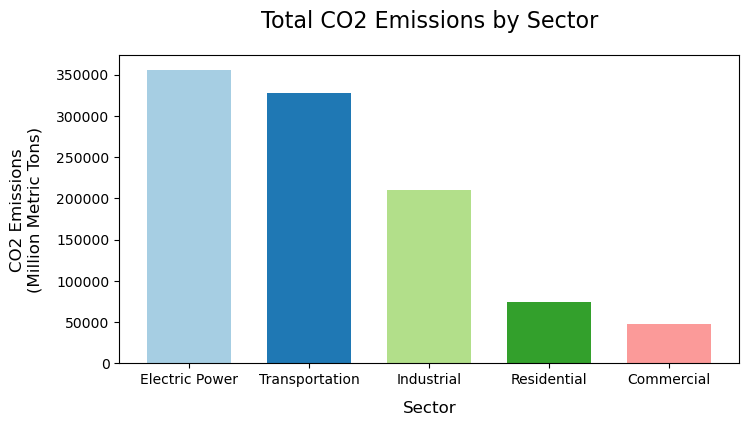

In [12]:
# Filter and process the data
df_filtered = df[df['sectorId'] != 'TT'].copy()
df_filtered['value'] = pd.to_numeric(df_filtered['value'], errors='coerce')
df_filtered['sector-name'] = df_filtered['sector-name'].str.replace('carbon dioxide emissions', '').str.strip()
sector_emissions = df_filtered.groupby('sector-name')['value'].sum().reset_index().sort_values(by='value', ascending=False)

# Plot the data
plt.figure(figsize=(8, 4))
colors = sns.color_palette("Paired", len(sector_emissions))
plt.bar(sector_emissions['sector-name'], sector_emissions['value'], color=colors, width=0.7)

# Add labels and title
plt.title('Total CO2 Emissions by Sector', fontsize=16, pad=20)
plt.xlabel('Sector', fontsize=12, labelpad=10)
plt.ylabel('CO2 Emissions\n(Million Metric Tons)', fontsize=12, labelpad=10)

#### Plot 2 - CO2 Emissions by Fuel Type

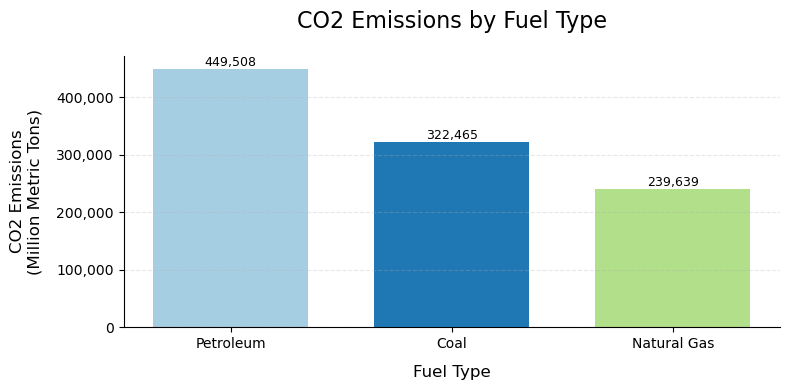

In [13]:
# Filter and process the data
df_filtered = df[df['fuel-name'] != 'All Fuels'].copy()
fuel_emissions = df_filtered.groupby('fuel-name')['value'].sum().reset_index().sort_values(by='value', ascending=False)

# Plot the data
plt.figure(figsize=(8, 4))
colors = sns.color_palette("Paired", len(fuel_emissions))
bars = plt.bar(fuel_emissions['fuel-name'], fuel_emissions['value'], color=colors, width=0.7)

# Customize the plot
plt.title('CO2 Emissions by Fuel Type', fontsize=16, pad=20)
plt.xlabel('Fuel Type', fontsize=12, labelpad=10)
plt.ylabel('CO2 Emissions\n(Million Metric Tons)', fontsize=12, labelpad=10)
plt.xticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.3)

# Add value labels on bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{int(bar.get_height()):,}', 
             ha='center', va='bottom', fontsize=9)

# Format y-axis and adjust spines
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Adjust layout and show plot
plt.tight_layout()
plt.show()

#### Plot 3 - Total CO2 Emissions by State

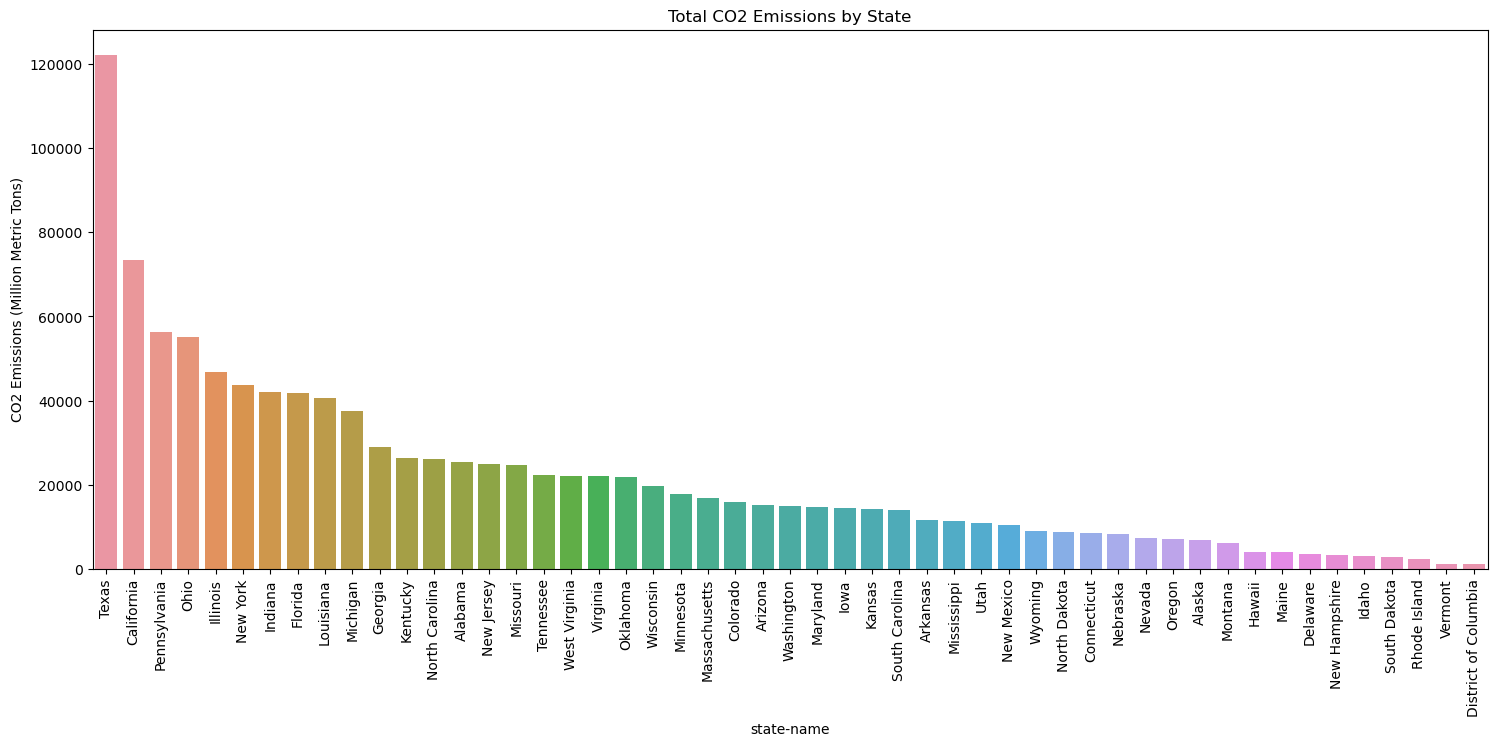

In [14]:
# Filter out 'United States'
df_filtered = df[df['state-name'] != 'United States']

# Group by state to calculate total emissions
state_emissions = df_filtered.groupby('state-name')['value'].sum().reset_index()

# Sort the values in descending order
state_emissions = state_emissions.sort_values(by='value', ascending=False)

# Plotting
plt.figure(figsize=(18, 7))
sns.barplot(x='state-name', y='value', data=state_emissions)
plt.title('Total CO2 Emissions by State')
plt.ylabel('CO2 Emissions (Million Metric Tons)')
plt.xticks(rotation=90)
plt.show()

#### Plot 4 - CO2 Emissions Over Time by Sector

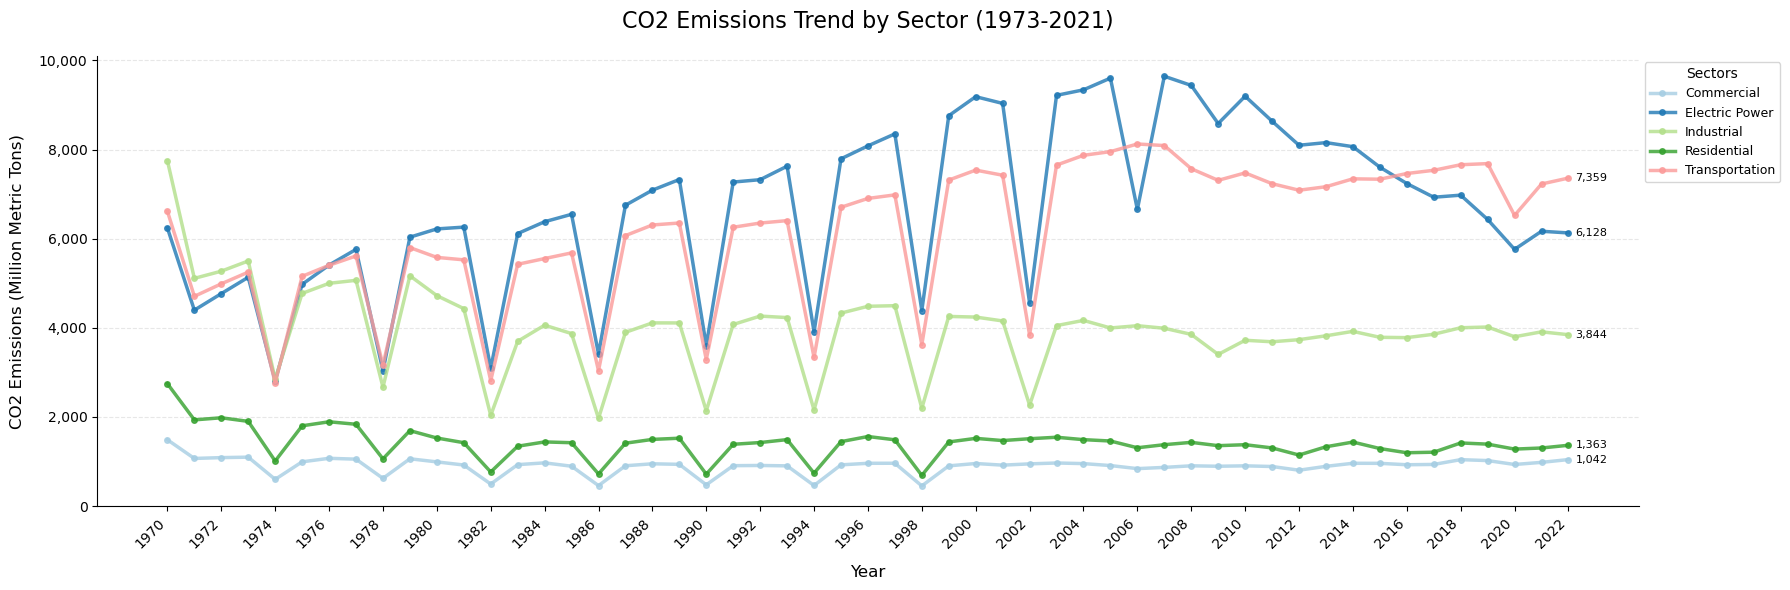

In [15]:
# Map shorter names for sectors
shorten_names = {
    'Residential carbon dioxide emissions': 'Residential',
    'Industrial carbon dioxide emissions': 'Industrial',
    'Commercial carbon dioxide emissions': 'Commercial',
    'Electric Power carbon dioxide emissions': 'Electric Power',
    'Transportation carbon dioxide emissions': 'Transportation'
}

# Filter and process data
emissions_trend = df[df['sector-name'] != 'Total carbon dioxide emissions from all sectors'].copy()
emissions_trend['sector-name'] = emissions_trend['sector-name'].replace(shorten_names)
emissions_pivot = emissions_trend.groupby(['period', 'sector-name'])['value'].sum().unstack()

# Plot setup
fig, ax = plt.subplots(figsize=(18, 6))
colors = sns.color_palette("Paired", len(emissions_pivot.columns))

# Plot trends for each sector
for sector, color in zip(emissions_pivot.columns, colors):
    ax.plot(emissions_pivot.index, emissions_pivot[sector], label=sector, linewidth=2.5, color=color, 
            marker='o', markersize=4, alpha=0.8)

# Customize plot
plt.title('CO2 Emissions Trend by Sector (1973-2021)', fontsize=16, pad=20)
plt.xlabel('Year', fontsize=12, labelpad=10)
plt.ylabel('CO2 Emissions (Million Metric Tons)', fontsize=12, labelpad=10)
plt.xticks(emissions_pivot.index[::2], rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.legend(title='Sectors', fontsize=9, title_fontsize=10, bbox_to_anchor=(1, 1), loc='upper left', fancybox=True)

# Remove unnecessary spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Annotate last value for each sector
max_year = emissions_pivot.index[-1]
for sector in emissions_pivot.columns:
    last_value = emissions_pivot[sector].iloc[-1]
    ax.annotate(f'{int(last_value):,}', xy=(max_year, last_value), xytext=(5, 0), textcoords='offset points', 
                fontsize=8, va='center')

plt.tight_layout()
plt.show()

#### Plot 5 - Fuel Type Contribution to CO2 Emissions

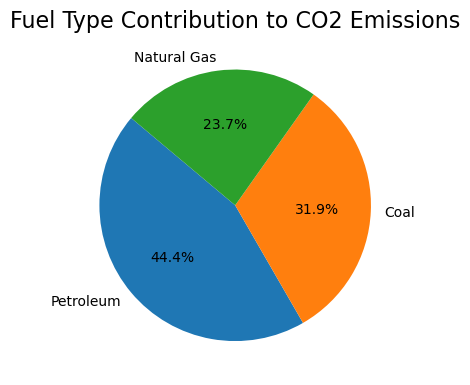

In [16]:
# Filter and process data
df_filtered = df[df['fuel-name'] != 'All Fuels'].copy()
fuel_emissions = df_filtered.groupby('fuel-name')['value'].sum().reset_index().sort_values(by='value', ascending=False)

# Plot pie chart
plt.figure(figsize=(4, 4))
plt.pie(
    fuel_emissions['value'], 
    labels=fuel_emissions['fuel-name'], 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=plt.cm.tab10.colors[:len(fuel_emissions)]
)

# Add title and display
plt.title('Fuel Type Contribution to CO2 Emissions', fontsize=16)
plt.tight_layout()
plt.show()

#### Plot 6 - Top 10 States for Each Fuel Type CO2 Emissions

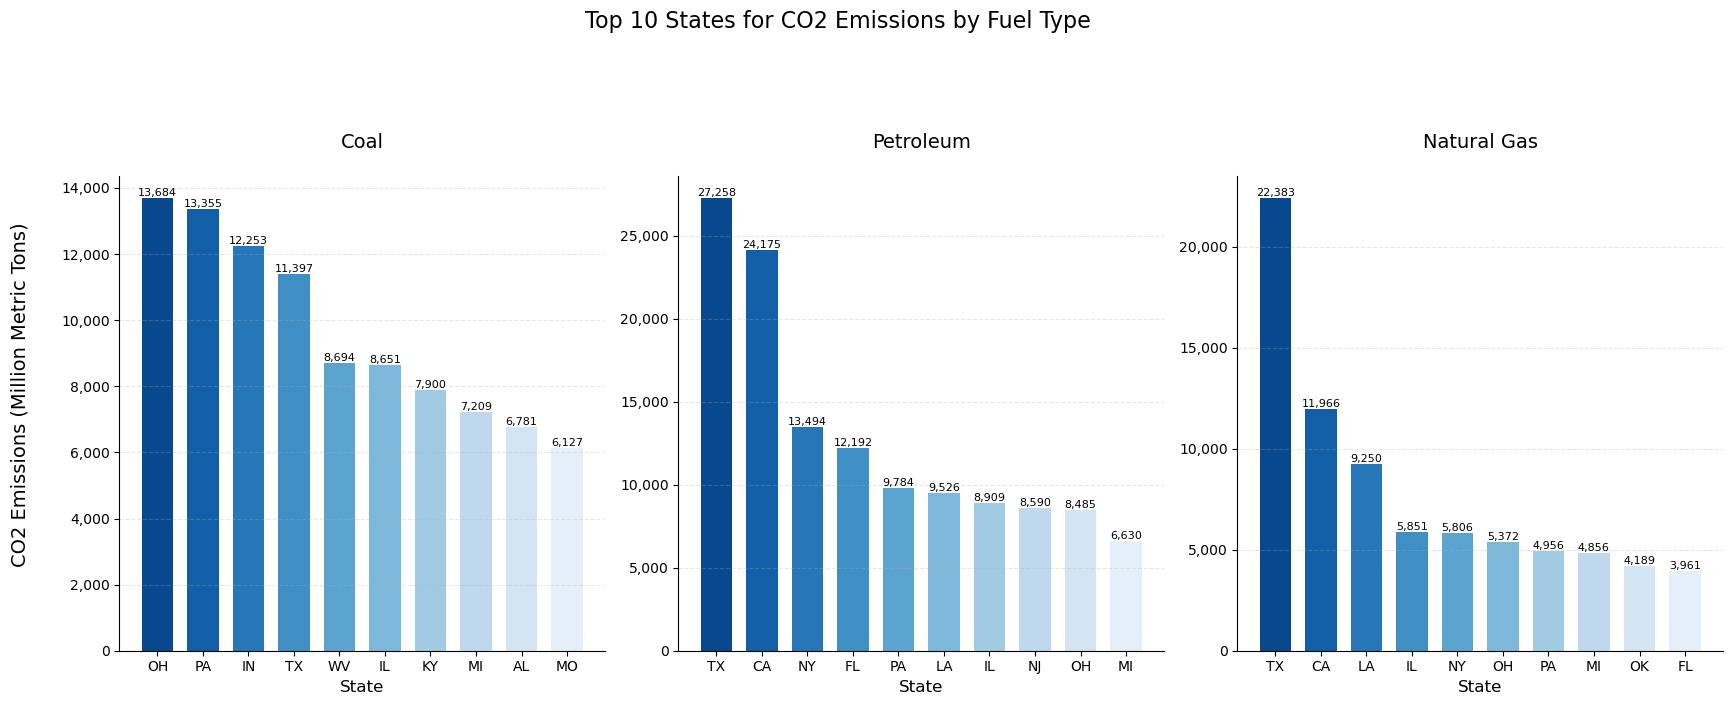


Coal:
Total emissions: 174,778 Million Metric Tons
Top state: OH

Petroleum:
Total emissions: 242,847 Million Metric Tons
Top state: TX

Natural Gas:
Total emissions: 128,198 Million Metric Tons
Top state: TX


In [17]:
# Filter and process data
df_filtered = df[(df['fuel-name'] != 'All Fuels') & (df['state-name'] != 'United States')].copy()
fuel_state_emissions = df_filtered.groupby(['fuel-name', 'stateId'])['value'].sum().reset_index()
fuel_types = df_filtered['fuel-name'].unique()

# Plot setup
num_fuels = len(fuel_types)
fig, axes = plt.subplots(1, num_fuels, figsize=(num_fuels * 6, 7))
colors = sns.color_palette("Blues_r", 10)

# Plot for each fuel type
for i, fuel in enumerate(fuel_types):
    # Prepare data for plotting
    fuel_data = fuel_state_emissions[fuel_state_emissions['fuel-name'] == fuel]
    top_states = fuel_data.sort_values(by='value', ascending=False).head(10)

    # Create bar plot
    bars = axes[i].bar(top_states['stateId'], top_states['value'], color=colors, width=0.7)

    # Customize subplot
    axes[i].set_title(fuel, fontsize=14, pad=20)
    axes[i].set_xlabel('State', fontsize=12)
    axes[i].tick_params(axis='x', labelsize=10)
    axes[i].tick_params(axis='y', labelsize=10)
    axes[i].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))
    axes[i].grid(axis='y', linestyle='--', alpha=0.3)
    axes[i].spines['top'].set_visible(False)
    axes[i].spines['right'].set_visible(False)

    # Add value labels
    for bar in bars:
        height = bar.get_height()
        axes[i].text(bar.get_x() + bar.get_width() / 2, height, f'{int(height):,}', ha='center', va='bottom', fontsize=8)

# Shared y-axis label and main title
fig.text(0.04, 0.5, 'CO2 Emissions (Million Metric Tons)', va='center', rotation='vertical', fontsize=14)
fig.suptitle('Top 10 States for CO2 Emissions by Fuel Type', fontsize=16, y=1.05)

# Adjust layout
plt.tight_layout(rect=[0.06, 0.05, 1, 0.95])
plt.show()

# Print summary statistics
for fuel in fuel_types:
    fuel_data = fuel_state_emissions[fuel_state_emissions['fuel-name'] == fuel]
    total_emissions = fuel_data['value'].sum()
    top_state = fuel_data.nlargest(1, 'value')['stateId'].iloc[0]
    print(f"\n{fuel}:")
    print(f"Total emissions: {int(total_emissions):,} Million Metric Tons")
    print(f"Top state: {top_state}")

#### Plot 7 - California CO2 Emissions by Fuel Type Over Time

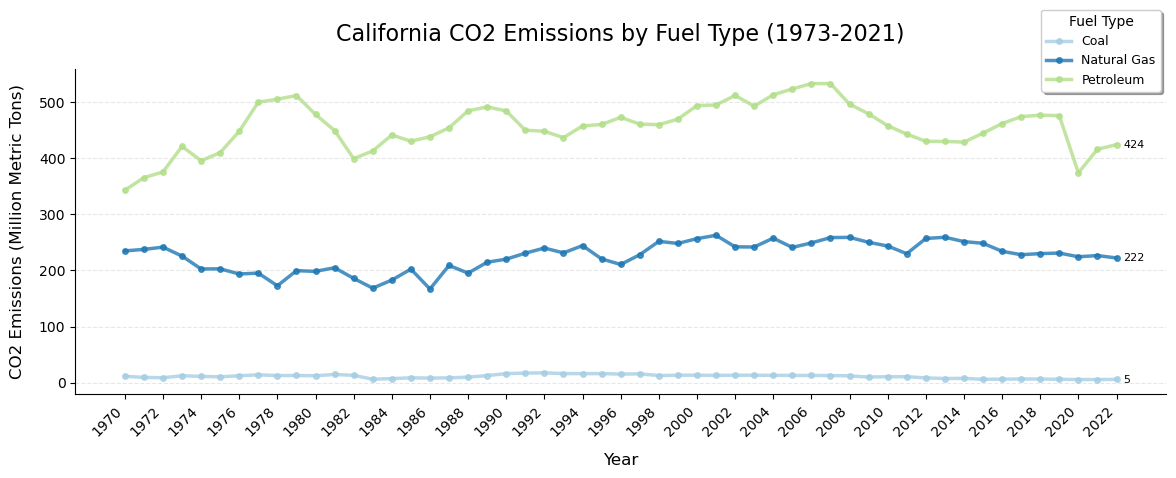


Summary Statistics for California:
Number of fuel types: 3
Time period: 1970 to 2022


In [18]:
# Data processing
california_data = df[(df['stateId'] == 'CA') & (df['fuel-name'] != 'All Fuels')].copy()
california_fuel_trend = california_data.groupby(['period', 'fuel-name'])['value'].sum().reset_index()
california_fuel_pivot = california_fuel_trend.pivot(index='period', columns='fuel-name', values='value')

# Plot setup
fig, ax = plt.subplots(figsize=(12, 5))
colors = sns.color_palette("Paired", len(california_fuel_pivot.columns))

# Plot trends for each fuel type
for fuel, color in zip(california_fuel_pivot.columns, colors):
    ax.plot(california_fuel_pivot.index, california_fuel_pivot[fuel], label=fuel, linewidth=2.5, 
            color=color, marker='o', markersize=4, alpha=0.8)

# Customize plot
plt.title('California CO2 Emissions by Fuel Type (1973-2021)', fontsize=16, pad=20)
plt.xlabel('Year', fontsize=12, labelpad=10)
plt.ylabel('CO2 Emissions (Million Metric Tons)', fontsize=12, labelpad=10)
plt.xticks(california_fuel_pivot.index[::2], rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.grid(axis='y', linestyle='--', alpha=0.3)

# Customize legend
plt.legend(title='Fuel Type', fontsize=9, title_fontsize=10, loc='upper left', 
           bbox_to_anchor=(0.88, 1.2), fancybox=True, shadow=True)

# Remove unnecessary spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_axisbelow(True)

# Add annotations for the last value of each fuel type
max_year = california_fuel_pivot.index[-1]
for fuel in california_fuel_pivot.columns:
    last_value = california_fuel_pivot[fuel].iloc[-1]
    ax.annotate(f'{int(last_value):,}', xy=(max_year, last_value), xytext=(5, 0), textcoords='offset points', 
                fontsize=8, va='center')

# Layout adjustment
plt.tight_layout()
plt.show()

# Print summary statistics
print("\nSummary Statistics for California:")
print(f"Number of fuel types: {len(california_fuel_pivot.columns)}")
print(f"Time period: {california_fuel_pivot.index[0]} to {california_fuel_pivot.index[-1]}")